In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
my_image = np.genfromtxt('sample_data/in.txt', delimiter=',')

In [ ]:
my_image.shape

(200, 200)

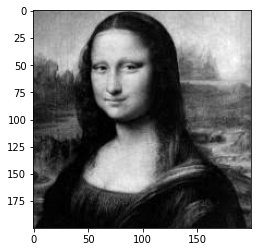

In [ ]:
plt.imshow(my_image,cmap='gray')
plt.show()

In [ ]:
hed_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
hed_kernel

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [ ]:
ved_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
ved_kernel

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [ ]:
def conv(image, kernel):
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))
    # kernel = np.flip(np.flip(kernel, 0), 1)
    image = zero_pad(image, (Hk-1)//2, (Wk-1)//2)
    for i in range(Hi):
        for j in range(Wi):
            for k in range(Hk):
                for l in range(Wk):
                    out[i][j] += image[i + k, j + l]*kernel[k, l]

    return out

def zero_pad(image, pad_height, pad_width):
   
    H, W = image.shape
    out = None

    out = np.zeros((H+2*pad_height, W+2*pad_width))
    out[pad_height:(pad_height+H),pad_width:(pad_width+W)] = image

    return out


In [ ]:
Final_Result_1 = conv(my_image, hed_kernel)

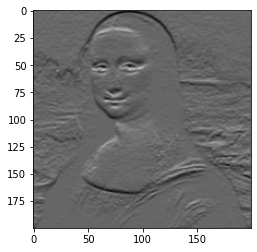

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.imshow(Final_Result_1,cmap='gray')
plt.show()
plt.savefig('Final_Result_1.png', dpi=300)

In [ ]:
Final_Result_2 = conv(my_image, ved_kernel)

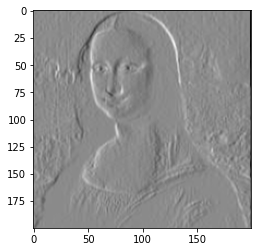

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.imshow(Final_Result_2,cmap='gray')
plt.show()
plt.savefig('Final_Result_2.png', dpi=300)

In [ ]:
correct1, correct2= np.load("sample_data/correct_out1.npy"),np.load("sample_data/correct_out2.npy")
assert np.allclose(Final_Result_1,correct1), "Wrong Final_Resul_1"
assert np.allclose(Final_Result_2,correct2), "Wrong Final_Resul_2"